# Image filtering methods

## 1. Statistical filters

### Load test images:

Adding noise to images:

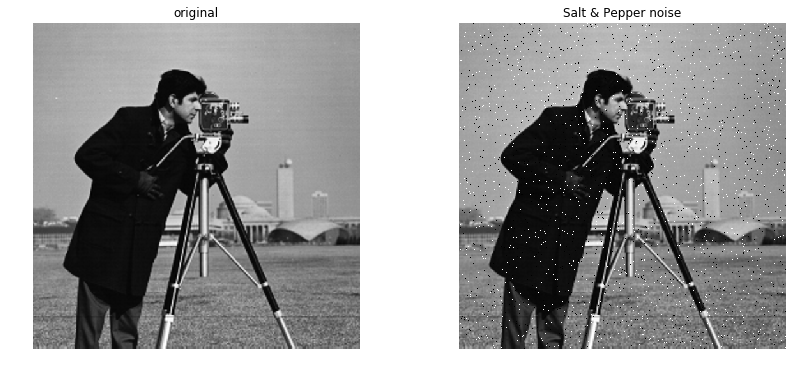

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from skimage import data
from skimage import img_as_ubyte

img = data.camera()

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(data.camera())
noisy_image[noise > 0.99] = 255 
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    
plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

### Median filters:

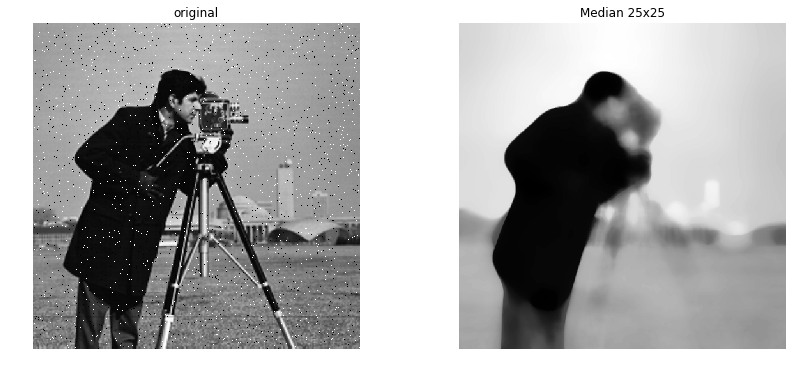

In [ ]:
from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy_image)
sel5 = disk(5) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img,img_med5x5,'Median 5x5')
plt.savefig('median.png')

sel25 = disk(25)
img_med25x25 = median(img, sel25)
plot_comparison(img,img_med25x25,'Median 25x25')

### Local averaging filter:

Add Gaussian noise to the image:

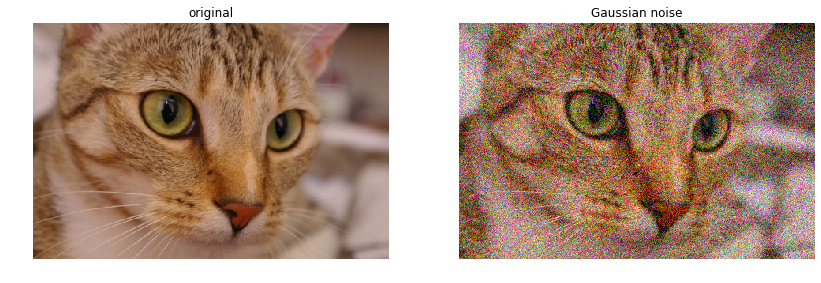

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from skimage import data
from skimage import img_as_ubyte

from skimage import data, img_as_float
from skimage.util import random_noise


img = img_as_float(data.chelsea())
sigma = 0.15
noisy_image_normal = random_noise(img, var=sigma**2)

plot_comparison(img,noisy_image_normal,'Gaussian noise')

In [ ]:
from skimage.filters import rank
from skimage.color import rgb2gray

img = img_as_ubyte(rgb2gray(noisy_image_normal))

selem = disk(3) # structuring element 
img_locmed = rank.mean(img, selem=selem)
plot_comparison(img,img_locmed,'Local mean with disk 3x3')
plt.savefig('Local_mean.png')

## 2. Morphological Filtering

### Erosion and dilation:

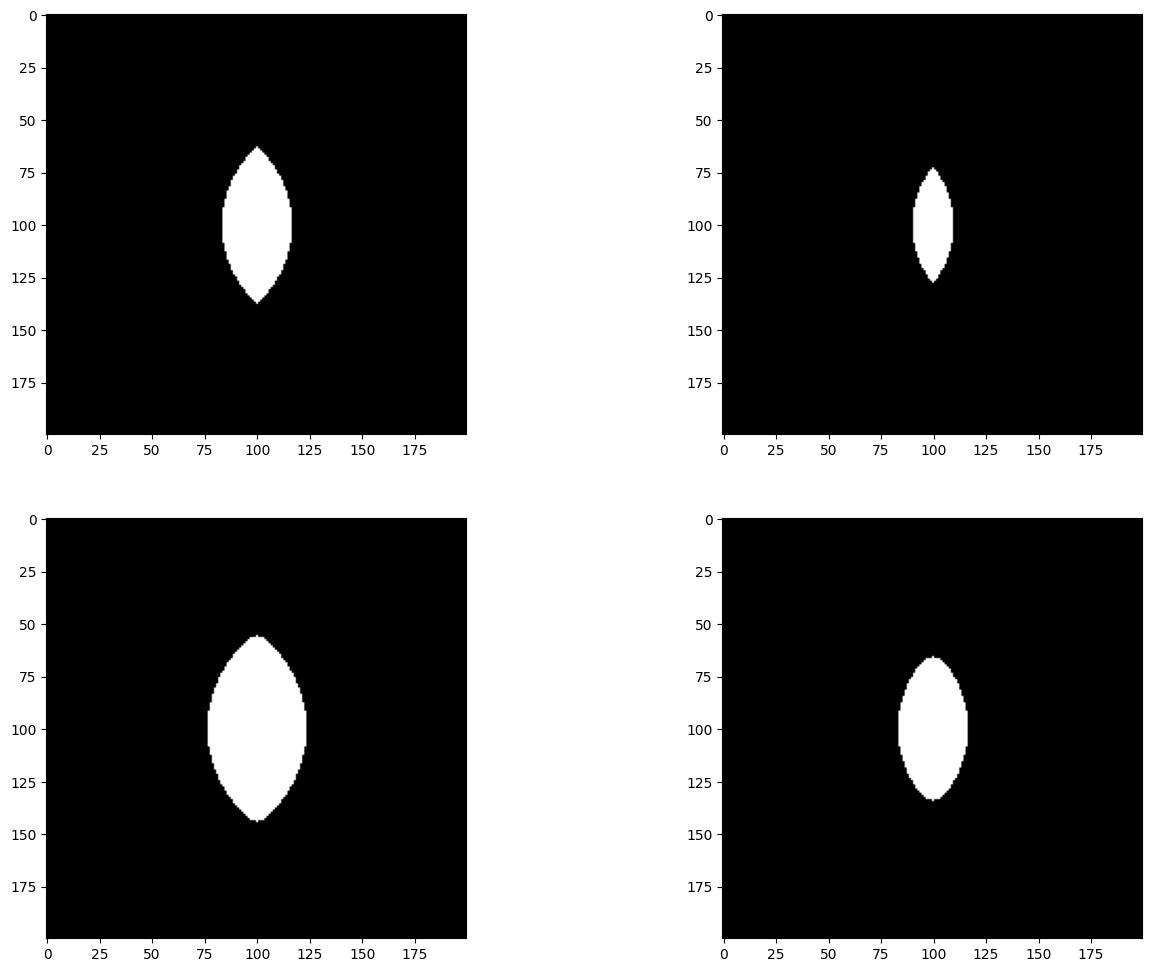

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


nrows, ncols = (200,200)
row, col = np.ogrid[:nrows, :ncols]
disk_diameter = 50

cnt_row1, cnt_col1 = nrows / 2, ncols / 3
outer_disk_mask1 = ((row - cnt_row1)**2 + (col - cnt_col1)**2 < (disk_diameter)**2)

cnt_row2, cnt_col2 = nrows / 2, 2*ncols / 3
outer_disk_mask2 = ((row - cnt_row2)**2 + (col - cnt_col2)**2 < (disk_diameter)**2)

# Intersection (logical AND): 
I_and = outer_disk_mask1 & outer_disk_mask2

from skimage.morphology import erosion, dilation
from skimage.morphology import disk

selem = disk(7)
eroded = erosion(I_and, selem)
dilated = dilation(I_and, selem)
eroded_dilated = dilation(eroded, selem)


fig = plt.figure(figsize=(16, 12))
plt.subplot(221),plt.imshow(I_and, cmap = 'gray')
plt.subplot(222),plt.imshow(eroded, cmap = 'gray')
plt.subplot(223),plt.imshow(dilated, cmap = 'gray')
plt.subplot(224),plt.imshow(eroded_dilated, cmap = 'gray')


plt.show()


An example using a phantom brain image

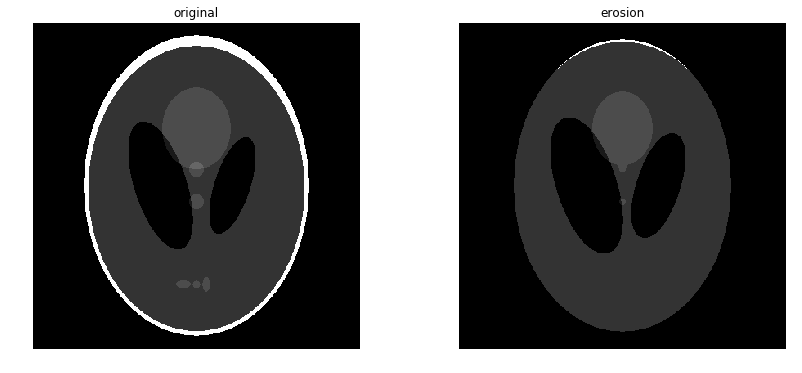

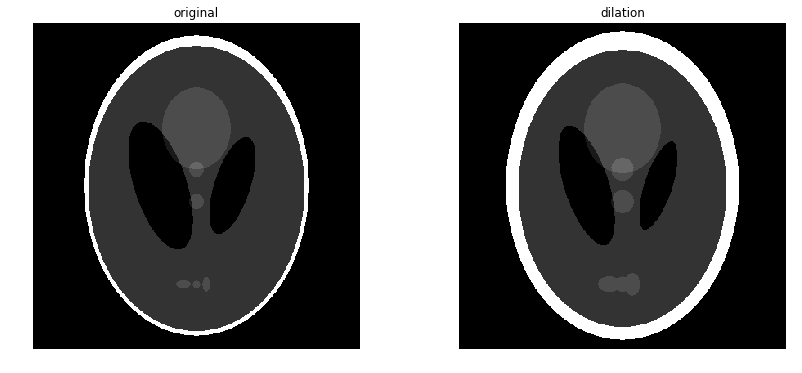

In [ ]:
import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io

orig_phantom = img_as_ubyte(io.imread(os.path.join(data_dir, "phantom.png"),
                                      as_gray=True))

from skimage.morphology import erosion, dilation
from skimage.morphology import disk

selem = disk(5)
eroded = erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded, 'erosion')
plt.savefig('erosion.png')

dilated = dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation')
plt.savefig('dilation.png')


### Top-Hat morphological 

https://en.wikipedia.org/wiki/Top-hat_transform

Remove smalls objects from an image using the top-hat morphological transformation



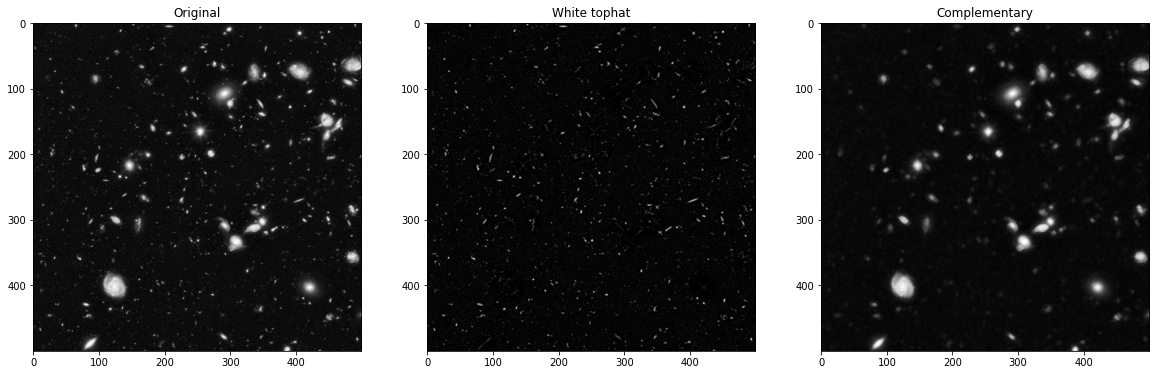

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import color, morphology

image = color.rgb2gray(data.hubble_deep_field())[:500, :500]

footprint = morphology.disk(2)
res = morphology.white_tophat(image, footprint)

fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(image - res, cmap='gray')

plt.show()

## 3. Spatial (convolutional) filters

### 2D convolution:

In [ ]:
import numpy as np 
I = np.array([[0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 1, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0]])
h = np.array([[1,2,3],[4,5,6],[7,8,9]])

from scipy import ndimage
Iconv = ndimage.convolve(I, h, mode='constant', cval=0.0)
Iconv

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 3, 0, 0],
       [0, 0, 4, 5, 6, 0, 0],
       [0, 0, 7, 8, 9, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

### Gaussian filters:

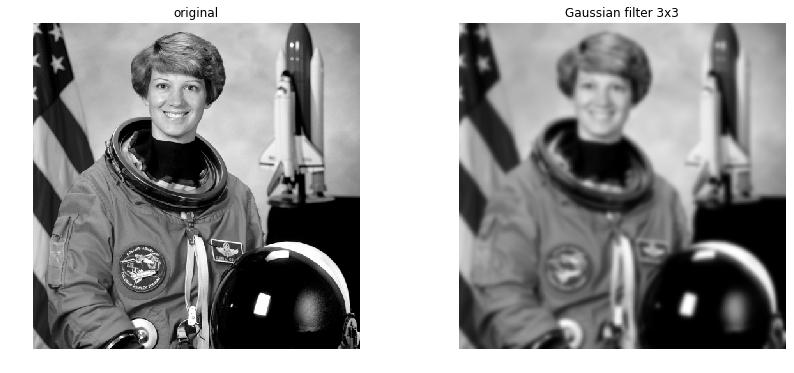

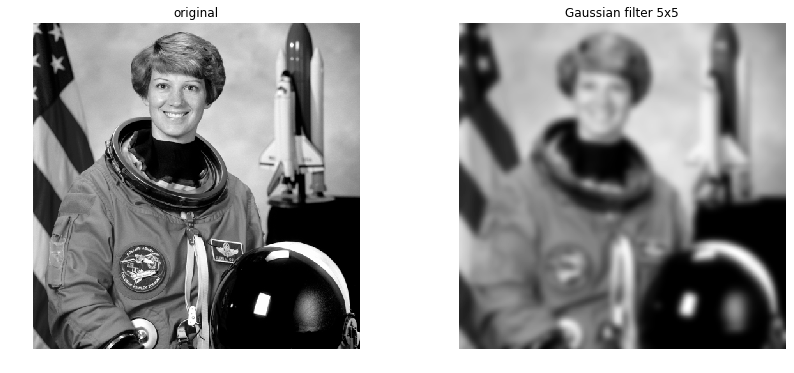

In [ ]:
from skimage import data
from skimage.filters import gaussian
from skimage.color import rgb2gray

img = data.astronaut()
img = rgb2gray(img)

img_f = gaussian(img, 3)
plot_comparison(img,img_f, 'Gaussian filter 3x3')
plt.savefig('gaussian.png')


img_f = gaussian(img, 5)
plot_comparison(img,img_f, 'Gaussian filter 5x5')

### Edge detection: Sobel and Roberts gradient operators

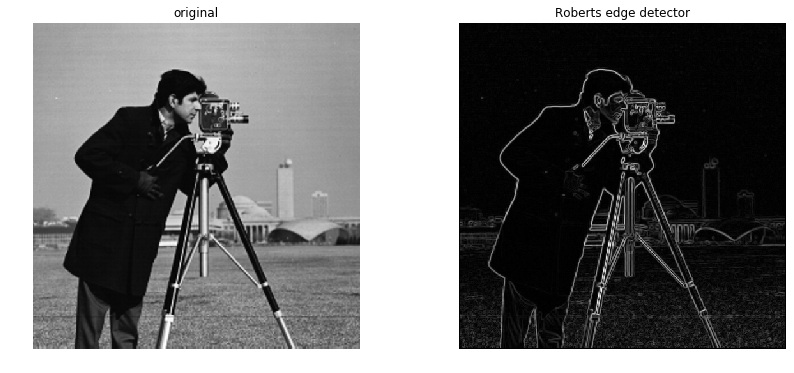

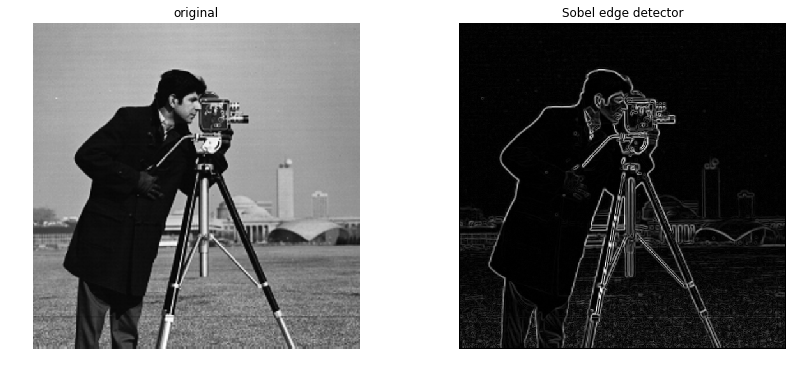

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel

image = camera()

edge_roberts = roberts(image)
plot_comparison(image,edge_roberts, 'Roberts edge detector')
plt.savefig('roberts_edges.png')


edge_sobel = sobel(image)
plot_comparison(image,edge_sobel, 'Sobel edge detector')

### Enhancing contours: Laplacian filters: 

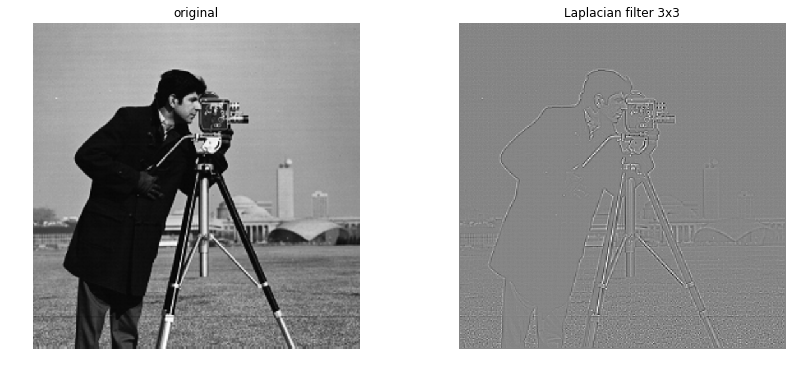

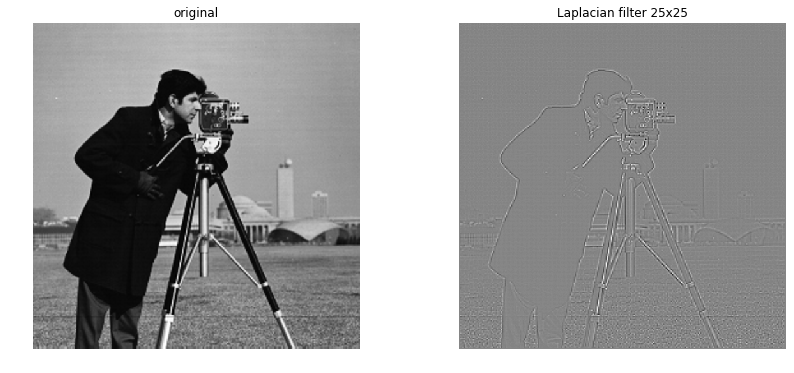

In [ ]:
from skimage import data
from skimage.filters import laplace
from skimage.color import rgb2gray

img_f = laplace(image, 3)
plot_comparison(image,img_f, 'Laplacian filter 3x3')
plt.savefig('laplacian.png')


img_f = laplace(image, 25)
plot_comparison(image,img_f, 'Laplacian filter 25x25')

## 4. Filtering in the frequency domain:

The Convolution theorem: Fourier transform turns convolution into a product:

$FT\{f*h\} = FT\{f\}\cdot FT\{h\}$

Then the result of a convolution can be obtained as the inverse Fourier transform of the product:


${\displaystyle g=\{f*h\}={FT}^{-1}\{F\cdot H\},}$


where $F = FT\{f\}$ and $H = FT\{h\}$

First we obtain the 2D Discrete Fourier Transform of the image (FFT algorithm):


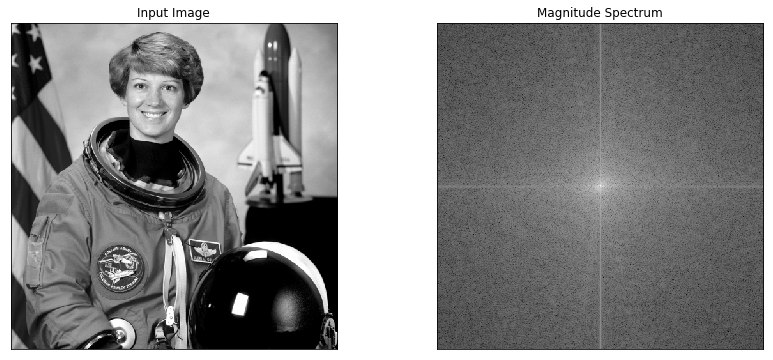

In [ ]:
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from matplotlib import pyplot as plt

img = data.astronaut()
img = rgb2gray(img)


f = np.fft.fft2(img) # Discrete Fourier Transform using FFT algorithm
fshift = np.fft.fftshift(f) # Shift to have zero frequency (origin) at the center of the image
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Logarithmic scale for better visualization of the differences in powert spectrum

fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.savefig('frequency.png')
plt.show()


### High-pass filter: 

Just remove the regions with lower frequencies near the origin of the DFT. Then obtain the filtered image by applying the inverse discrete Fourier transform to the result:

In [ ]:
rows, cols = img.shape
crow,ccol = np.int(rows/2) , np.int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plot_comparison(img,img_back, 'High-pass filter in the frequency domain')

### Low-pass filter: 

Just remove the regions with higher frequencies far from the origin of the DFT. Then obtain the filtered image by applying the inverse discrete Fourier transform to the result:

In [ ]:
nrows, ncols = img.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 50
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()

plot_comparison(img,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

Let's increase the disk diameter and therefore the frequencies that are kept in the filter: Since we remove less high-frequency content of the spactrum, the filtered image retains more detail than in the previous example:

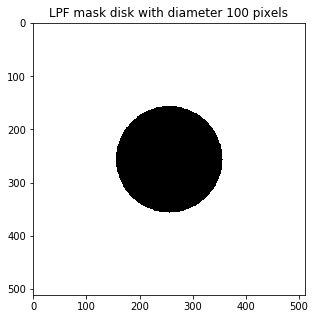

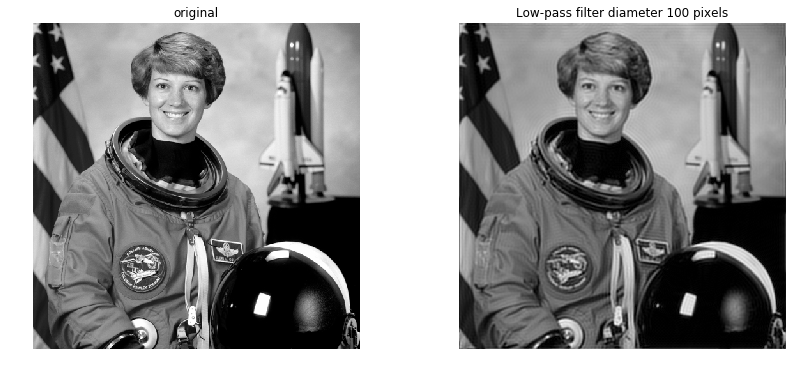

In [ ]:
disk_diameter = 100
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()
plot_comparison(img,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

# Exercises (optional)

Generate a single Python notebook implementing and answering the following questions: 

- Task 1: Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

- Task 2: Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

* ‘gaussian’ Gaussian-distributed additive noise.
* ‘localvar’ Gaussian-distributed additive noise, with specified
local variance at each point of image.
* ‘poisson’ Poisson-distributed noise generated from the data.
* ‘salt’ Replaces random pixels with 1.
* ‘pepper’ Replaces random pixels with 0 (for unsigned images) or
-1 (for signed images).
* ‘s&p’ Replaces random pixels with either 1 or low_val, where
low_val is 0 for unsigned images or -1 for signed images.
* ‘speckle’ Multiplicative noise using out = image + n*image, where
n is Gaussian noise with specified mean & variance.

Documentation of the function can be found at
https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise

- Task 3: Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure. 

- Task 4: The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results. 

- Task 5: Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges. 

- Task 6: Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform. 

- Task 7: Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs
How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk 


